# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | nenjiang
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | nelson bay
Processing Record 7 of Set 1 | namibe
Processing Record 8 of Set 1 | ulkan
Processing Record 9 of Set 1 | umuarama
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | eston
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | inzer
Processing Record 16 of Set 1 | rio grande
Processing Record 17 of Set 1 | union city
Processing Record 18 of Set 1 | springbok
Processing Record 19 of Set 1 | tungkang
City not found. Skipping...
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | zhezkazgan
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,13.06,47,0,1.03,CL,1674438643
1,nenjiang,49.1833,125.2167,-31.77,92,85,1.89,CN,1674438644
2,cape town,-33.9258,18.4232,22.43,74,0,3.60,ZA,1674438644
3,vaini,-21.2000,-175.2000,31.09,74,20,3.09,TO,1674438645
4,mataura,-46.1927,168.8643,17.94,35,12,3.47,NZ,1674438645


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,13.06,47,0,1.03,CL,1674438643
1,nenjiang,49.1833,125.2167,-31.77,92,85,1.89,CN,1674438644
2,cape town,-33.9258,18.4232,22.43,74,0,3.60,ZA,1674438644
3,vaini,-21.2000,-175.2000,31.09,74,20,3.09,TO,1674438645
4,mataura,-46.1927,168.8643,17.94,35,12,3.47,NZ,1674438645


In [9]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 563
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        564 non-null    object 
 1   Lat         564 non-null    float64
 2   Lng         564 non-null    float64
 3   Max Temp    564 non-null    float64
 4   Humidity    564 non-null    int64  
 5   Cloudiness  564 non-null    int64  
 6   Wind Speed  564 non-null    float64
 7   Country     558 non-null    object 
 8   Date        564 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 44.1+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

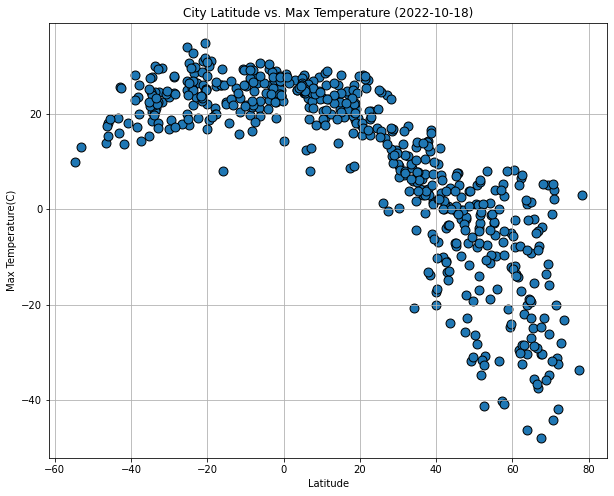

In [10]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
# Incorporate the other graph properties
plt.figure(figsize=(10,8))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.grid()
plt.scatter(x_values,y_values,edgecolors='black',s=80)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

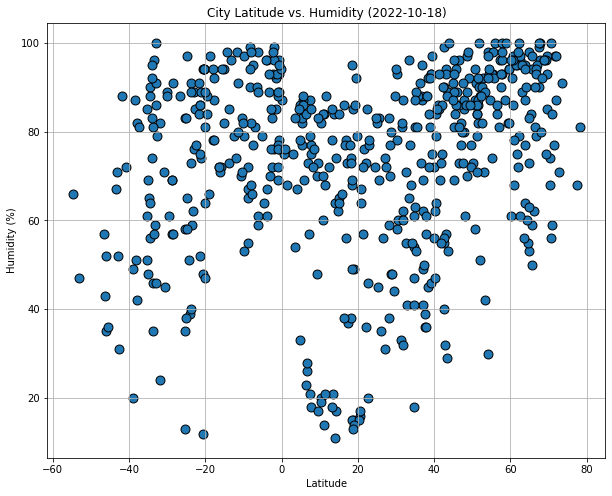

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
# Incorporate the other graph properties
plt.figure(figsize=(10,8))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()
plt.scatter(x_values,y_values,edgecolors='black',s=80)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

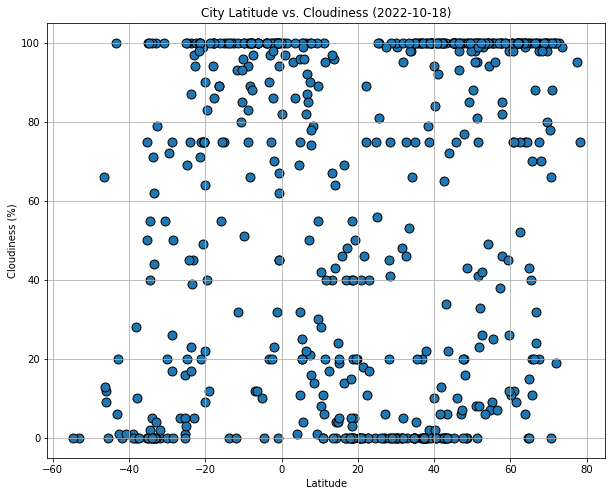

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
# Incorporate the other graph properties
plt.figure(figsize=(10,8))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()
plt.scatter(x_values,y_values,edgecolors='black',s=80)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

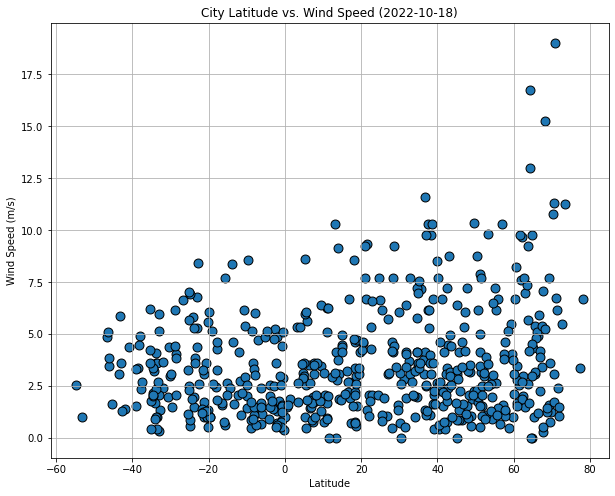

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
# Incorporate the other graph properties
plt.figure(figsize=(10,8))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()
plt.scatter(x_values,y_values,edgecolors='black',s=80)
# Save the figure
plt.savefig("../output_data/Fig4.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def linearReg(x_values,y_values,x_p,y_p):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10,8))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,xy=(x_p,y_p),fontsize=20,color="red")
    print(f"The r-value is: {rvalue**2}")


In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nenjiang,49.1833,125.2167,-31.77,92,85,1.89,CN,1674438644
7,ulkan,57.2430,107.3223,-40.17,96,38,1.58,RU,1674438646
11,eston,51.1501,-108.7514,-3.93,84,95,7.91,CA,1674438647
12,georgetown,5.4112,100.3354,27.96,82,20,2.57,MY,1674438647
14,inzer,54.2167,57.5556,-18.75,98,49,0.94,RU,1674438647


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,13.06,47,0,1.03,CL,1674438643
2,cape town,-33.9258,18.4232,22.43,74,0,3.60,ZA,1674438644
3,vaini,-21.2000,-175.2000,31.09,74,20,3.09,TO,1674438645
4,mataura,-46.1927,168.8643,17.94,35,12,3.47,NZ,1674438645
5,nelson bay,-32.7167,152.1500,24.49,79,79,1.34,AU,1674438645


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.682654795232697


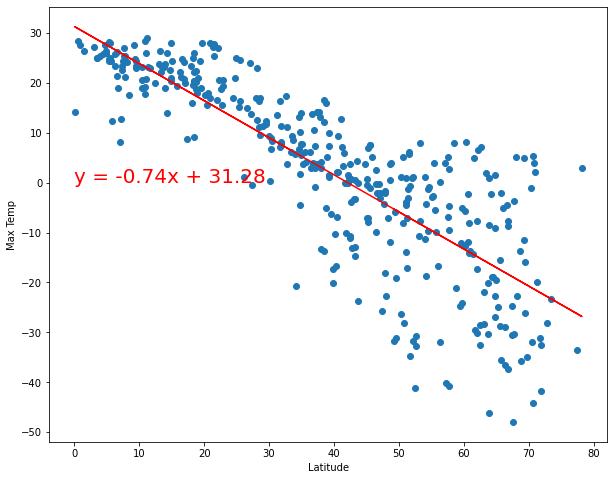

In [29]:
# Linear regression on Northern Hemisphere
linearReg(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],0,0)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-value is: 0.12780992694630972


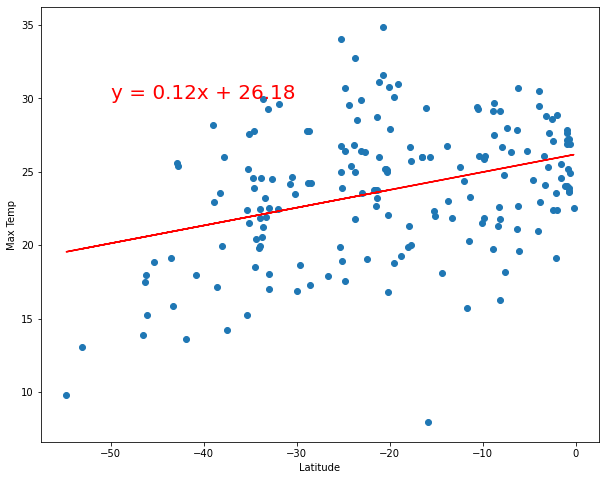

In [30]:
# Linear regression on Southern Hemisphere
linearReg(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],-50,30)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:**

These linear regressions discribe the relationship between latitude and max temperature in Northern and Southern Hemisphere perspectively. In general, the greater absolute latitude, the lower max temperature the city will have. But in northern hemisphere, the sample cities are more close to the linear regression line, comparing with the southern ones. We can draw the same conclusion from the r values in different plots, which means the cities are more likely to follow the rule of grearter latitude, lower temperature. Moreover, southern hemisphere cities are generally warmer than northern ones. For instance, there's no city under zero degree celsius below -50 latitude, but some are already -30 degree celsius at +50 latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.16416868196388795


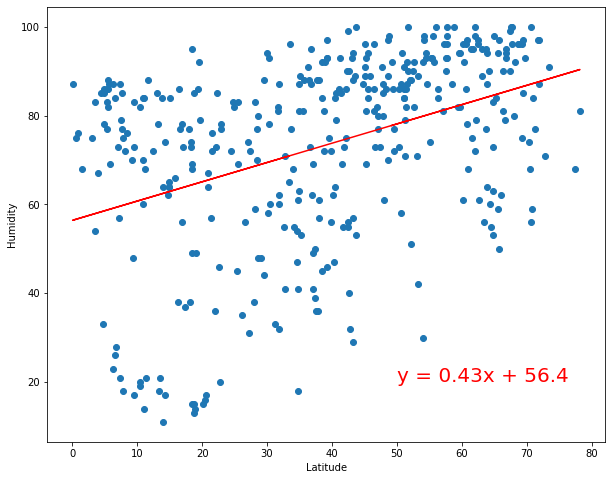

In [31]:
# Northern Hemisphere
linearReg(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],50,20)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: 0.18158612261160836


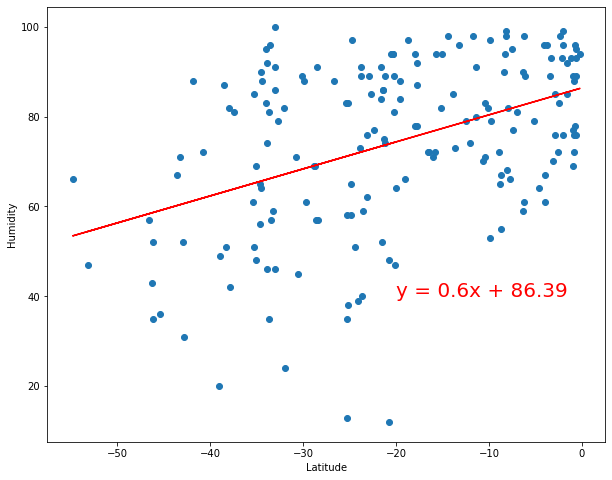

In [32]:
# Southern Hemisphere
linearReg(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],-20,40)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:**

These linear regressions discribe the relationship between latitude and humidity in Northern and Southern Hemisphere perspectively. The humidity increases as the latitude goes from south to the north in both half hemisphere. But reading from the r square values, we can know the correlation of the latitude and humidity are pretty weak.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07753590516715984


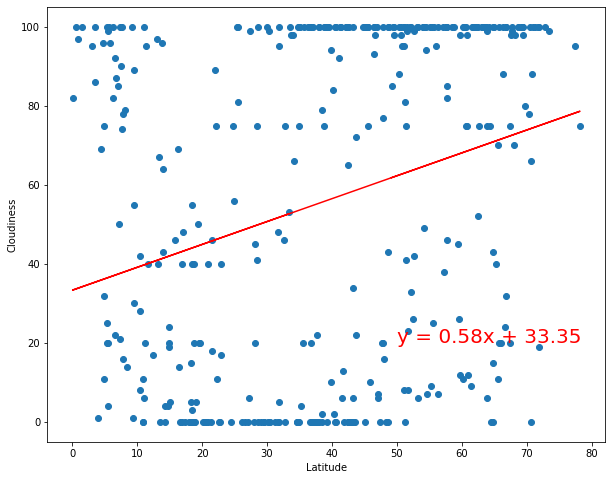

In [33]:
# Northern Hemisphere
linearReg(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],50,20)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is: 0.28261616893339286


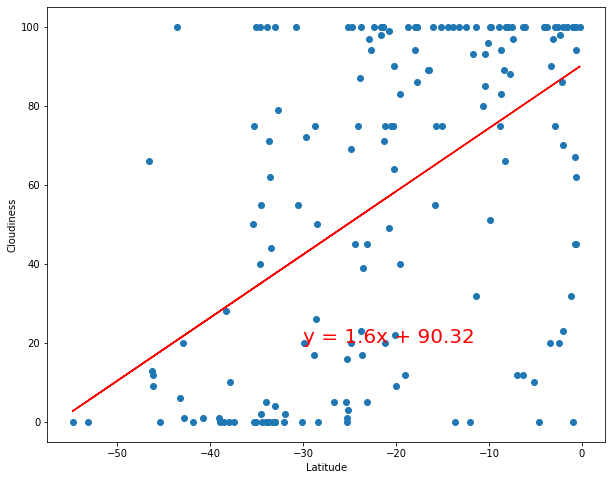

In [34]:
# Southern Hemisphere
linearReg(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],-30,20)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:**

These linear regressions discribe the relationship between latitude and cloudiness in Northern and Southern Hemisphere perspectively. They both have a positive correlation, which means when the latitude goes up from negative, the cloudiness will increase. But in northern hemisphere the r square is much lower than the southern one, which means the correlation in the northern hemisphere might not exit. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02386359149396907


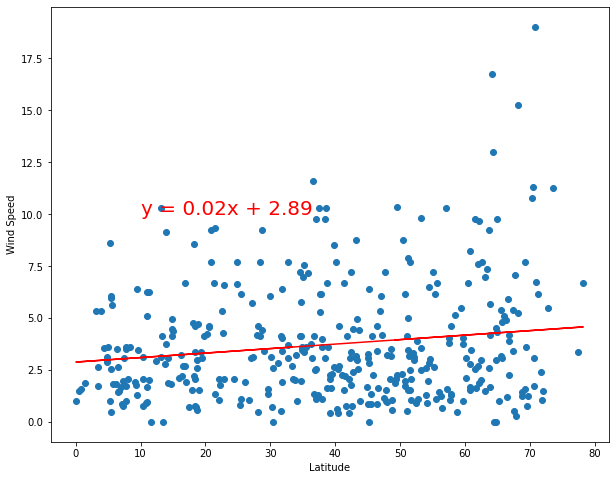

In [35]:
# Northern Hemisphere
linearReg(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],10,10)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: 0.021830024186314988


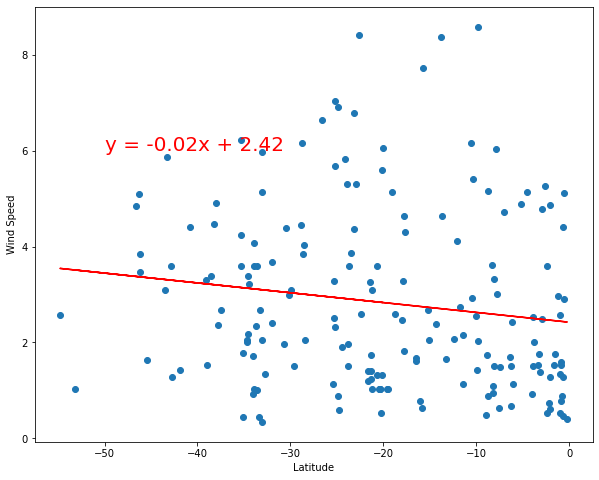

In [36]:
# Southern Hemisphere
linearReg(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],-50,6)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:**

These linear regressions discribe the relationship between latitude and wind speed in Northern and Southern Hemisphere perspectively. Both of these r square values are extremely low, which indicates that there are no relationship between the latitude and wind speed.